In [10]:
#
# File created on Tue May 02 2023 20:55:17 by Darnell#5336, named 01.KNN.ipynb
# 
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pathlib import Path

# Eucledian Distance

in 2D:
$$
d(x,y) = \sqrt{(x_1-y_1)^2 + (x_2-y_2)^2}
$$

or for n dimensions:

$$
d(x,y) = \sqrt{\sum_{i=1}^{n}(x_i-y_i)^2}
$$

In [11]:
from collections import Counter


def euclidean_distance(x1, x2):
    """
    Here we want to calculate the euclidean distance between two vector points

    Parameters
    ----------
    x1 : array-like, shape (n_features,)
        First point
    x2 : array-like, shape (n_features,)
        Second point
    """
    # we want to use numpy to calculate the distance
    distance = np.sqrt(np.sum((x1 - x2) ** 2))
    return distance

class KNN:
    def __init__(self, k=3):
        self.k = k

    # follow the standard implementation of other libraries
    def fit(self, X, y):
        """
        Here we aim to fit the training samples and some training labels
        
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Training samples
        y : array-like, shape (n_samples,)
            Training labels
        """
        # this does not have a training step in the knn method, so we just store the training data
        self.X_train = X
        self.y_train = y

    def predict(self, X) -> np.ndarray:
        """
        Here we want to predict new samples

        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            New samples
        """
        # This can get multiple samples (standardised indicatior by a capital X), so we want to write a helper function
        # to get the prediction for a single sample
        predict_labels: list = [self.predict_single(x) for x in X]
        return np.array(predict_labels)

    def predict_single(self, x):
        """
        Here we want to predict a single sample

        Parameters
        ----------
        x : array-like, shape (n_features,)
            New sample
        """
        # we want to calculate the distance between the new sample and every sample in the training set
        distances: list = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # then we want to get the k nearest neighbours and labels
        k_indices: np.ndarray = np.argsort(distances)[:self.k] # sliced the first k elements
        k_nearest_labels: list = [self.y_train[i] for i in k_indices]
        # then majority vote, so get most common class label
        most_common: list[tuple] = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

X_train shape: (120, 4)
X train first row: [5.1 2.5 3.  1.1]
y_train shape: (120,)
y train first row: 1


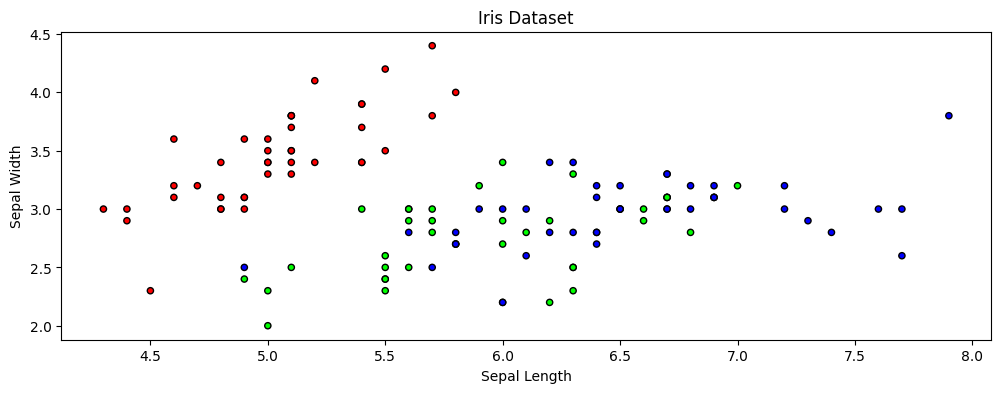

In [12]:
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X, y = iris.data, iris.target

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

print(f"X_train shape: {X_train.shape}")
print(f"X train first row: {X_train[0]}")
print(f"y_train shape: {y_train.shape}")
print(f"y train first row: {y_train[0]}")

fig, ax = plt.subplots(figsize=(12, 4))
cmap = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap, edgecolor="k", s=20)
ax.set(title="Iris Dataset", xlabel="Sepal Length", ylabel="Sepal Width")
plt.show()

In [14]:
# create a classifier
clf = KNN(k=3)
# fit the classifier
clf.fit(X_train, y_train)
# get predictions
predictions: np.ndarray = clf.predict(X_test)

# calculate the accuracy
accuracy: float = np.sum(predictions == y_test) / len(y_test)

print(f"Predictions: {predictions}")
print(f"Accuracy: {accuracy}")


Predictions: [1 1 2 0 1 0 0 0 1 2 1 0 2 1 0 1 2 0 2 1 1 1 1 1 2 0 2 1 2 0]
Accuracy: 1.0


Predicted label: blue


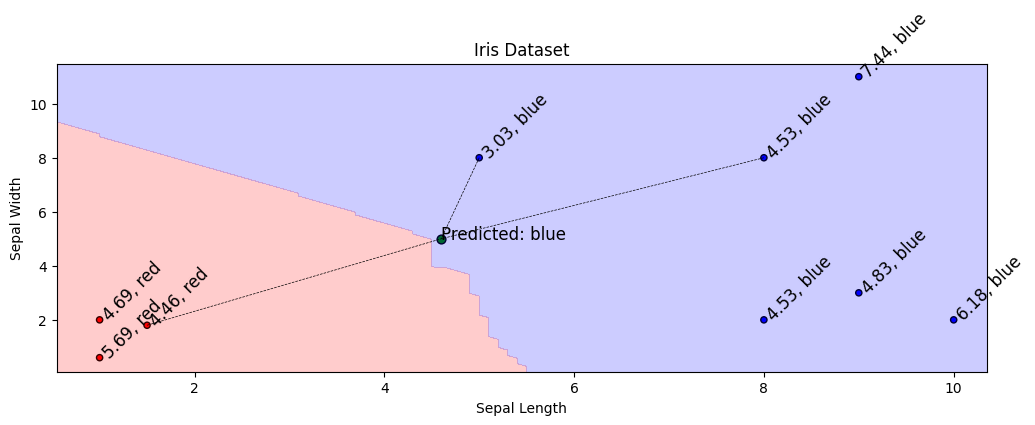

In [55]:
# plot an example conceptial plot for how knn works
cmap = ListedColormap(["#FF0000", "#0000FF"])

# create a dataset
X = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11], [8, 2], [10, 2], [9, 3]])
y = np.array([0, 0, 1, 1, 0, 1, 1, 1, 1])
clf = KNN(k=3)
clf.fit(X, y)

# add labels and an example point to be predicted
labels = ["red", "blue"]
example_point = [4.6, 5]

# plot the data
fig, ax = plt.subplots(figsize=(12, 4))
ax.set(title="Iris Dataset", xlabel="Sepal Length", ylabel="Sepal Width")
# add lines to the X nearest neighbours and label them with the distance
for i in range(len(X)):
    ax.text(X[i][0], X[i][1], f"{euclidean_distance(X[i], example_point):.2f}, {labels[y[i]]}", fontsize=12, rotation=45)

# add dashed lines to the k nearest neighbours and label them with the distance
distances: list = [euclidean_distance(example_point, x_train) for x_train in X]
k_indices: np.ndarray = np.argsort(distances)[:3] # sliced the first k elements
for i in k_indices:
    ax.plot([X[i][0], example_point[0]], [X[i][1], example_point[1]], "k--", linewidth=0.5)

# caculate what the example point would be classified as
single_prediction: int = clf.predict_single(example_point)
print(f"Predicted label: {labels[single_prediction]}")

# add a label to the example point with the predicted label
ax.text(example_point[0], example_point[1], f"Predicted: {labels[single_prediction]}", fontsize=12)

ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolor="k", s=20)
ax.scatter(example_point[0], example_point[1], c="green", edgecolor="k", s=40)

# calculate and plot the decision boundary
x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# plot a contourf with a single contour level, so it will just colour the decision boundary
ax.contourf(xx, yy, Z, alpha=0.2, cmap=cmap, levels=1)

plt.show()


In [56]:
# save our plot as a figure in the cwf/figures folder so we can add it to the readme
dir = Path().cwd().parent / "figures"
dir.mkdir(parents=True, exist_ok=True)
fig.savefig(dir / "knn_decision_boundary.png", dpi=300, bbox_inches="tight")